# Homework 4: Evaluation Metrics for Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv',
                   sep=';', 
                   quotechar='"',
                   encoding='utf-8')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
selected_columns = ['age', 'job', 'marital', 'education',  'balance', 'housing',
                    'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
                    'previous', 'poutcome', 'y']

df_selected = df.copy()[selected_columns]
df_selected.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


### Target encoding

In [4]:
df_selected.y = (df_selected.y == 'yes').astype(int)
df_selected.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


## Split the data

Split your data in train/val/test sets with 60%/20%/20% distribution. Use Scikit-Learn for that (the train_test_split function) and set the seed to 42. Make sure that the target value y is not in your dataframe.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_full_train, df_test = train_test_split(df_selected, test_size = 0.2, random_state = 1)

In [7]:
len(df_full_train), len(df_test)

(36168, 9043)

In [8]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)
len(df_train), len(df_val)

(27126, 9042)

In [9]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [10]:
del df_train["y"]
del df_val["y"]
del df_test["y"]

In [11]:
df_full_train.y.value_counts(normalize= True)

y
0    0.882797
1    0.117203
Name: proportion, dtype: float64

## Question 1: ROC AUC feature importance

In [12]:
numerical = list(df_train.dtypes[df_train.dtypes == 'int64'].index)
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [13]:
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

## Question 2: Training the model

### One hot encoding

In [14]:
from sklearn.feature_extraction import DictVectorizer

In [15]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [16]:
dv = DictVectorizer(sparse = False)

In [17]:
X_train = dv.fit_transform(train_dicts)

In [18]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.fit_transform(val_dicts)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
_ = model.fit(X_train, y_train)

In [21]:
y_pred = model.predict_proba(X_val)[:,1]

In [22]:
from sklearn.metrics import roc_curve

In [23]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

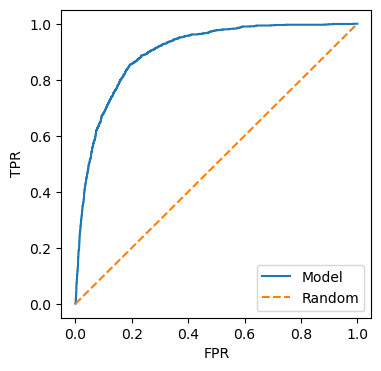

In [24]:
plt.figure(figsize=(4, 4))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()

### AUC
What's the AUC of this model on the validation dataset? 

In [25]:
from sklearn.metrics import auc

In [26]:
print(f'The AUC on the validation set is. {auc(fpr, tpr):.3f}')

The AUC on the validation set is. 0.900
